In [1]:
from imports import *
import seaborn as sns


In [ ]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps.read_dataframe(df,'enter','leave')

df.shape

In [ ]:
vsteps.plot()

In [ ]:
data = vsteps.step_keys()
dt_deltas = np.diff(data)
dt_deltas = [d.total_seconds()/60 for d in dt_deltas]


In [ ]:
sns.histplot(x=dt_deltas)

<AxesSubplot:>

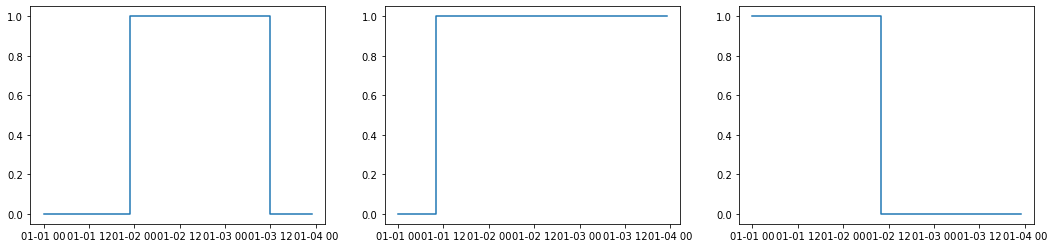

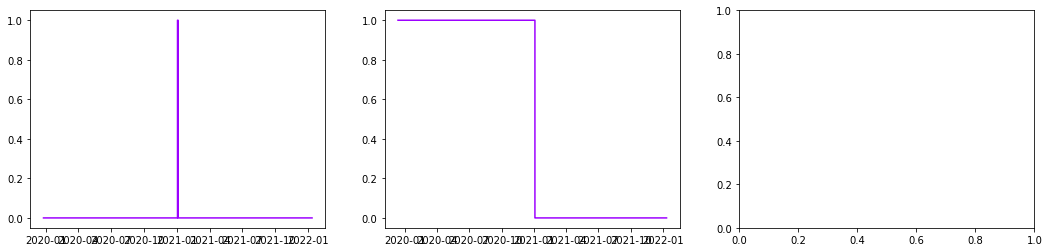

In [2]:
t = np.arange(pd.Timestamp(2021,1,1),pd.Timestamp(2021,1,4),pd.Timedelta(hours=1)).astype(pd.Timestamp)

fig,ax = plt.subplots(ncols=3, figsize=(18,4))
fig2,ax2 = plt.subplots(ncols=3, figsize=(18,4))

s1 = Step(end=pd.Timestamp(2021,1,2))
s2 = Step(start=pd.Timestamp(2021,1,1,12,15),end=pd.Timestamp(2021,1,3,1,5))
s3 = Step(start=pd.Timestamp(2021,1,1))

ax[0].step(t,s2(t))
ax[1].step(t,s3(t))
ax[2].step(t,s1(t))

s2.plot(plot_range=(pd.Timestamp(2021,1,1),pd.Timestamp(2021,1,4)),ax=ax2[0])
#s2.plot()
#s3.plot()
s1.plot(ax=ax2[1],ts_grain = pd.Timedelta(hours=1))


<AxesSubplot:>

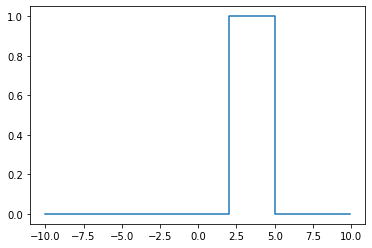

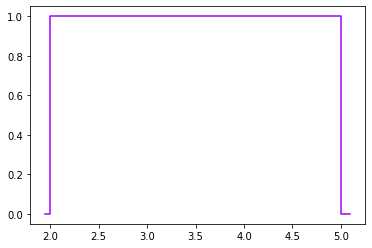

In [3]:
#import cupy as cp
fig,ax = plt.subplots()
t = np.arange(-10,10,0.1)
si = Step(start=2,end=5)

ax.step(t,si(t))
si.plot()
